# Exercise 1: Logistic Regression

## Plan

1. Review linear regression in scikit-learn
2. Try to use linear regression for classification
3. Using logistic regression for classification in scikit-learn
4. Demonstrate use of logistic regression to predict survival of Titanic passengers !

## Part 1: Review of linear regression

In this exercise, we consider the glass identification dataset ([description](https://raw.githubusercontent.com/o-m-i-d/ML_exercises_2016/master/glass.names) , [data](https://raw.githubusercontent.com/o-m-i-d/ML_exercises_2016/master/glass.data)).

In [580]:
# importing glass identification dataset using pandas
import pandas as pd 
import numpy as np
glass =  pd.read_csv('glass.data',header=None)
names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass.columns = names
glass = glass.groupby('id').sum()
glass = glass.sort_values('al')
glass.head(10)


,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1
184,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.0,0.00,6
110,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.0,0.00,2
158,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.0,0.00,3
153,1.51779,13.64,3.65,0.65,73.00,0.06,8.93,0.0,0.00,3


Suppose we want to predict ri, refractory index, and our only feature is al, aluminium. We can do it using linear regression. First we plot the data (ri against al) using Pandas scatter plot.

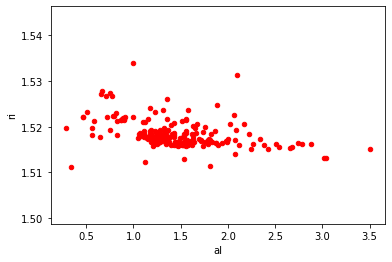

In [581]:
import matplotlib.pyplot as plt
# scatter plot using Pandas
pd.DataFrame.plot(glass).scatter('al','ri',color='r')

Then we fit a linear regression model to our data.

In [582]:
# fit a linear regression model
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X = glass['al']
X = pd.DataFrame(X)
y = glass['ri']
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)
regr = linear_model.LinearRegression()
X_train.shape
regr.fit(X,y)
# make predictions for all values of X
pred = regr.predict(X)

We plot the prediction line with respect to all other data.

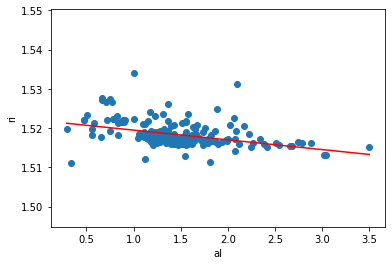

In [583]:
# put the plots together
fig,ax = plt.subplots()
ax.scatter(glass['al'],glass['ri'])
plt.plot(glass['al'],pred,'r')
ax.set_xlabel('al')
ax.set_ylabel('ri')
plt.show()

Remember that linear regression equation has the following form: $$y=\beta_0+\beta_1x$$

In [584]:
# compute coefficient
print("变量系数：\n",regr.coef_)

变量系数：
 [-0.00247761]


In [585]:
# compute intercept
print('常数项:\n',regr.intercept_)

常数项:
 1.5219453302386425


In [586]:
# compute prediction for al=4 
sam_al=[4]
sam_al = pd.DataFrame(sam_al)
regr.predict(sam_al)

array([1.5120349])

## Part 2: Predicting a categorial response using linear regression

We define a binary categorial response to predict. 

In [587]:
# examine glass_type
glass_type = glass['glass_type']
glass_type.unique()



array([1, 6, 2, 3, 7, 5], dtype=int64)

In [588]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass_type.isin([5,6,7])+0
glass.head(10)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0
184,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.0,0.00,6,1
110,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.0,0.00,2,0
158,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.0,0.00,3,0
153,1.51779,13.64,3.65,0.65,73.00,0.06,8.93,0.0,0.00,3,0


Let's change our task, so that we're predicting **household** using **al**. Let's visualize the relationship to figure out how to do this:

Text(0, 0.5, 'household')

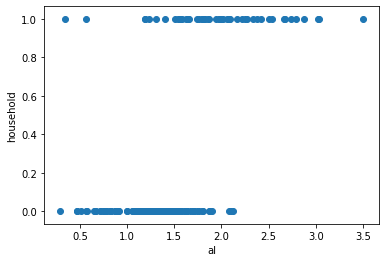

In [589]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

Let's draw a regression line, like we did before:

In [590]:
# fit a linear regression model and store the predictions
x1 = glass['al']
x1 = pd.DataFrame(x1)
y1 = glass['household']
regr2 = linear_model.LinearRegression().fit(x1,y1)

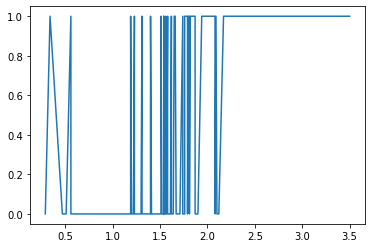

In [591]:
# scatter plot that includes the regression line
plt.plot(glass['al'],y1)

If **al=3**, what class do we predict for household? **1**

If **al=1.5**, what class do we predict for household? **0**

We predict the 0 class for **lower** values of al, and the 1 class for **higher** values of al. What's our cutoff value? Around **al=2**, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if **household_pred >= 0.5**, we predict a class of **1**, else we predict a class of **0**.

In [592]:
import numpy as np
# transform household_pred to 1 or 0
household_pred = regr2.predict(x1)
household_pred = (household_pred>0.5)+0

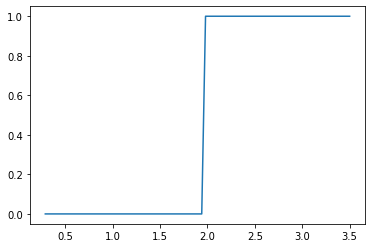

In [593]:
# plot the class predictions
plt.plot(glass['al'],household_pred)

## Part 3: Using Logistic Regression Instead

Logistic regression can do just what we did:

In [594]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x1,household_pred)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

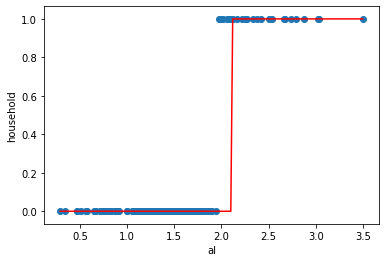

In [595]:
# plot the class predictions
log_pred = log_model.predict(x1)
log_pred
plt.scatter(x1,household_pred)
plt.plot(x1,log_pred,'r')
plt.xlabel('al')
plt.ylabel('household')
plt.show()

What if we wanted the **predicted probabilities** instead of just the **class predictions**, to understand how confident we are in a given prediction?

In [596]:
# store the predicted probabilites of class 1
from sklearn.metrics import precision_score
prob1 = log_model.predict_proba(x1)[:,1]## 返回预测属于标签1的概率

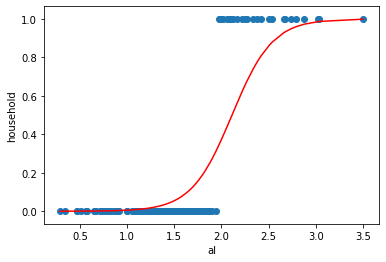

In [597]:
# plot the predicted probabilities
plt.scatter(glass['al'],household_pred)
plt.plot(glass['al'],prob1,color='r')
plt.xlabel('al')
plt.ylabel('household')
plt.show()

In [598]:
# examine some example predictions
al_exa = [1.5]
al_exa = pd.DataFrame(al_exa)
log_model.predict_proba(al_exa)#当al=1.5时，有94.5%的可能被归到window glass类，5.5%的可能被归到household glass类


array([[0.94533536, 0.05466464]])

The first column indicates the predicted probability of **class 0**, and the second column indicates the predicted probability of **class 1**.

### Interpreting Logistic Regression Coefficients

Remember that the probabilities returned by logistic function for class prediction are as follows:
$$p=\frac{e^{\beta_0+\beta_1x}}{1+e^{\beta_0+\beta_1x}}$$

In [599]:
# examine the coefficient for al
log_model.coef_#系数

array([[4.65359575]])

**Interpretation**: A 1 unit increase in 'al' is associated with a 4.18 unit increase in the log-odds of 'household' (log-odds of A is $log(\frac{P(A)}{1-P(A)})$).

In [600]:
# examine the intercept
log_model.intercept_#截距

array([-9.83071622])

**Interpretation**: For an 'al' value of 0, the log-odds of 'household' is -7.71.

### Logistic Regression with Categorical Features

Logistic regression can still be used with **categorical features**. Let's see an example:

In [601]:
# create a categorical feature related to Barium level
glass.ba.describe()
glass['high_ba'] = (glass.ba>1.5)+0 #钡水平高于1.5，称为good_glass


Using seaborn visualization library to draw a logistic curve:

C:\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


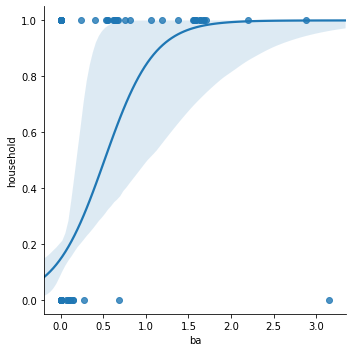

In [602]:
import seaborn as sns
sns.lmplot('ba','household',data=glass,logistic=True)

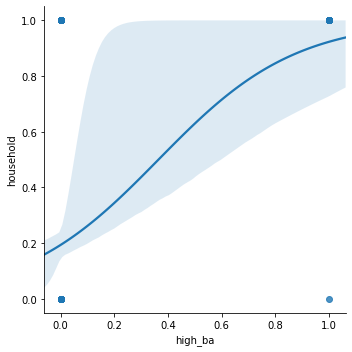

In [603]:
# categorical feature
sns.lmplot('high_ba','household',data=glass,logistic=True)

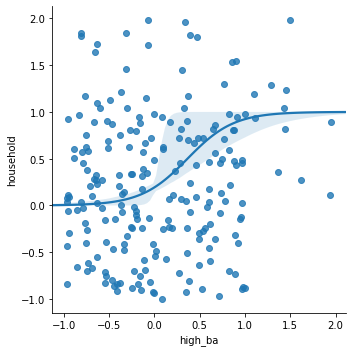

In [604]:
# categorical feature, with jitter added
sns.lmplot('high_ba','household',data=glass,logistic=True,x_jitter=True,y_jitter=True)#随机增加噪音点

In [605]:
# fit a logistic regression model
x2 = glass['high_ba']
x2 = pd.DataFrame(x2)
y2 = glass['household']
logistic_ba = LogisticRegression().fit(x2,y2)

In [606]:
# examine the coefficient for high_ba
logistic_ba.coef_

array([[2.39116786]])

**Interpretation:** Having a high 'ba' value is associated with a 4.43 unit increase in the log-odds of 'household' (as compared to a low 'ba' value).

## Part 4: Logistic regression with Titanic data

**Goal**: to predict the survival of the passengers of titanic based on characteristics of passengers ([description](https://raw.githubusercontent.com/o-m-i-d/ML_exercises_2016/master/titanic.names) , [data](https://raw.githubusercontent.com/o-m-i-d/ML_exercises_2016/master/titanic.data))

### Step 1: Read the data into Pandas

In [607]:
import pandas as pd
url = 'https://raw.githubusercontent.com/o-m-i-d/ML_exercises_2016/master/titanic.data'
titanic = pd.read_csv(url, index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2: Define features vectors and response

In [608]:
# chosen features are passenger class and number of parents/children abroad 
X = titanic['Pclass']
X = pd.DataFrame(X)
y = titanic['Survived']


### Step 3: Split the data into training and testing sets for cross validation

In [609]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


### Step 4: Fit a logistic regression model and obtain the coefficients

In [610]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
feature_cols = ['Pclass']
zipped=zip(feature_cols, logreg.coef_[0])
list(zipped)


[('Pclass', -0.8668999560186332)]

### Step 5: Make predictions on the testing set and calculate its accuracy

In [611]:
# class predictions (not predicted probabilities)
log_pred = logreg.predict(X_test)

In [612]:
# calculate classification accuracy
log_pred = pd.DataFrame(log_pred)
logreg.score(log_pred,y_test)

0.4260089686098655

### Step 6: Compare the test accuracy with the null accuracy

In [613]:
max(y_test.mean(), 1 - y_test.mean())

0.5739910313901345

### Confusion matrix of Titanic survival predictions

In [614]:
# print confusion matrix
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,log_pred)
print(con_mat)

[[109  19]
 [ 55  40]]


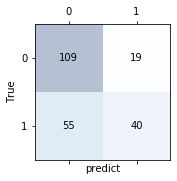

In [615]:
# save confusion matrix and slice into four pieces
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(con_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(con_mat.shape[0]):
    for j in range(con_mat.shape[1]):
        ax.text(x=j, y=i, s=con_mat[i, j], va='center', ha='center')
plt.xlabel('predict')
plt.ylabel('True')
plt.show()

In [616]:
# calculate the sensitivity
TP = con_mat[1,1]
FP = con_mat[0,1]
TN = con_mat[1,0]
FN = con_mat[0,0]
print (TP / float(TP + FN))


0.2684563758389262


In [617]:
# calculate the specificity
print (TN / float(TN + FP))

0.7432432432432432


Text(0, 0.5, 'frequency')

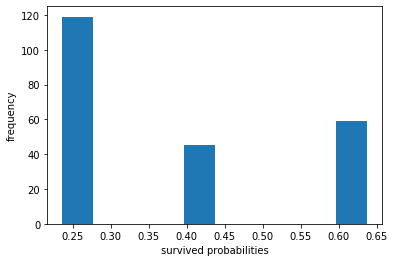

In [618]:
# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]
# histogram of predicted probabilities
plt.hist(y_pred_prob)
plt.xlabel('survived probabilities')
plt.ylabel("frequency")


In [619]:
# increase sensitivity by lowering the threshold for predicting survival
import numpy as np
y_pred_class = np.where(y_pred_prob > 0.3, 1, 0)


In [620]:
# old confusion matrix
confusion = con_mat
print (confusion)

[[109  19]
 [ 55  40]]


In [621]:
# new confusion matrix
print (confusion_matrix(y_test, y_pred_class))

[[84 44]
 [35 60]]


In [622]:
# new sensitivity (higher than before)
print (63 / float(63 + 32))

0.6631578947368421


In [623]:
# new specificity (lower than before)
print (72 / float(72 + 56))

0.5625


In [624]:
# calculate classification accuracy with new threshold
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, y_pred_class))

0.6457399103139013
